# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: Creating and using custom DataSets
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [ ]:
# FYI, review paper on data augmentation in DL:
# https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0197-0

In [1]:
# import libraries
import numpy as np
import torch

# import transformations and dataset/loader
import torchvision
import torchvision.transforms as T
from torch.utils.data import Dataset,DataLoader

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import the data

In [5]:
# # import dataset (comes with colab!)
# data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# # extract only the first 8
# labels = data[:8,0]
# data   = data[:8,1:]

import torchvision
MNIST = torchvision.datasets.MNIST(".", download=True)
data = MNIST.train_data
labels = MNIST.train_labels

data = data.view(data.shape[0], -1).numpy()
labels = labels.numpy()

indices = np.random.choice(data.shape[0], 8, replace=False)
data = data[indices]
labels = labels[indices]


# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# reshape to 2D!
dataNorm = dataNorm.reshape(dataNorm.shape[0],1,28,28)

# check sizes
print(dataNorm.shape)
print(labels.shape)

# convert to torch tensor format
dataT   = torch.tensor( dataNorm ).float()
labelsT = torch.tensor( labels ).long()

(8, 1, 28, 28)
(8,)


# Create a new class to create our custom dataset type

In [ ]:
# My custom dataset class is modeled after the official class
??torch.utils.data.TensorDataset

In [6]:
class customDataset(Dataset):
  def __init__(self, tensors, transform=None):

    # check that sizes of data and labels match
    assert all(tensors[0].size(0)==t.size(0) for t in tensors), "Size mismatch between tensors"
    
    # assign inputs
    self.tensors   = tensors
    self.transform = transform

  # what to do when someone wants and item from the dataset
  def __getitem__(self, index): 

    # return transformed version of x if there are transforms
    if self.transform:
      x = self.transform(self.tensors[0][index])
    else:
      x = self.tensors[0][index]

    # and return label
    y = self.tensors[1][index]

    return x,y # return the (data,label) tuple

  def __len__(self):
    return self.tensors[0].size(0)

# data -> dataset -> dataloader

In [7]:
# Note: several transforms work only on PIL-format data, so it's common to transform
#       to PIL, apply transformations, then transform back to tensor.

# create a list of transforms to apply to the image
imgtrans = T.Compose([ 
                      T.ToPILImage(),
                      T.RandomVerticalFlip(p=.5),
                      # T.RandomRotation(90), 
                      T.ToTensor()
                       ])

In [8]:
# now convert the data into datasets and then dataloaders

# convert into PyTorch Datasets
# NOTE: we have no test data here, but you should apply the same transformations to the test data
train_data = customDataset((dataT,labelsT),imgtrans)

# translate into dataloader objects
dataLoaded = DataLoader(train_data,batch_size=8,shuffle=False)

In [9]:
type(train_data)

__main__.customDataset

# Let's see the effects!

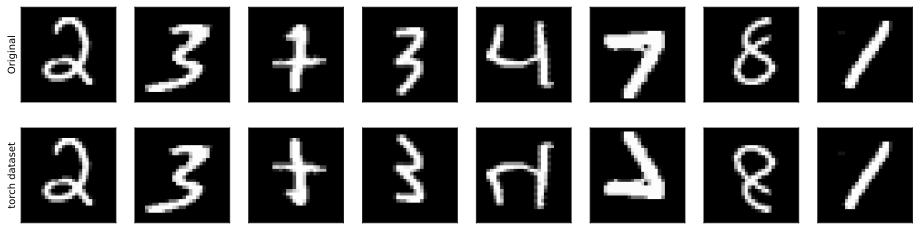

In [10]:
# import data from the dataloader, just like during training
X,y = next(iter(dataLoaded))


# create a figure
fig,axs = plt.subplots(2,8,figsize=(16,4))


# loop over images in the dataset
for i in range(8):

  # draw images
  axs[0,i].imshow(dataT[i,0,:,:].detach(),cmap='gray')
  axs[1,i].imshow(X[i,0,:,:].detach(),cmap='gray')

  # some niceties
  for row in range(2):
    axs[row,i].set_xticks([])
    axs[row,i].set_yticks([])

# row labels
axs[0,0].set_ylabel('Original')
axs[1,0].set_ylabel('torch dataset')

plt.show()

In [11]:
# Important to know: we haven't actually increased the amount of data
len(train_data)

8